<a href="https://colab.research.google.com/github/mmh52/ML-project/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sklearn

In [2]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url= 'https://raw.githubusercontent.com/mmh52/ML-project/main/data.csv'
data = pd.read_csv(url)

In [ ]:
data.head()

,Q128,Q254,Q255,Q256,Q257,Q258,Q259
0,1,1,4,3,3,3,3
1,2,2,2,3,3,3,3
2,2,1,3,4,1,1,4
3,1,1,1,1,1,1,3
4,2,1,2,3,1,2,2


In [4]:
data.shape
data.Q128.value_counts()

1    1103
2     791
0     533
Name: Q128, dtype: int64

In [5]:
data_0 = data[data['Q128'] == 0]
data_1 = data[data['Q128'] == 1]
data_2 = data[data['Q128'] == 2]

In [6]:
count = data['Q128'].value_counts()

print('Agree "2" :', count[2])
print('Hard to say "1" :', count[1])
print('Disagree "0":', count[0])

Agree "2" : 791
Hard to say "1" : 1103
Disagree "0": 533


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


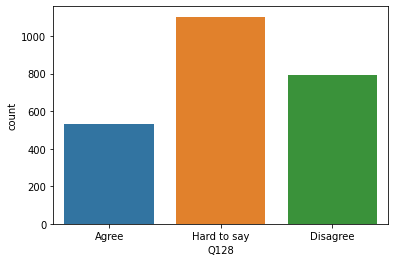

In [7]:
g = sns.countplot(data['Q128'])
g.set_xticklabels(['Agree', 'Hard to say','Disagree'])
plt.show()

In [8]:
X = data.iloc [:, 1:]
print(X)

      Q254  Q255  Q256  Q257  Q258  Q259
0        1     4     3     3     3     3
1        1     3     2     2     3     3
2        1     3     3     2     3     3
3        3     3     3     3     3     2
4        4     3     3     3     3     3
...    ...   ...   ...   ...   ...   ...
2422     1     3     3     2     2     2
2423     1     1     1     2     2     2
2424     2     2     1     2     2     2
2425     3     2     2     3     4     4
2426     4     1     1     1     1     1

[2427 rows x 6 columns]


In [9]:
Y = data . Q128
print(Y)

0       1
1       1
2       1
3       1
4       2
       ..
2422    2
2423    1
2424    1
2425    0
2426    1
Name: Q128, Length: 2427, dtype: int64


In [10]:
from sklearn . model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split (X, Y, test_size=0.2 , random_state =42)
print ( X_train .shape , Y_train . shape )
print ( X_test .shape , Y_test . shape )

(1941, 6) (1941,)
(486, 6) (486,)


In [11]:
from sklearn . naive_bayes import GaussianNB
from sklearn import svm
from sklearn . metrics import accuracy_score
from sklearn . metrics import confusion_matrix
from sklearn . tree import DecisionTreeClassifier

In [13]:
model1 = GaussianNB ()
model1 .fit ( X_train , Y_train )
c = model1 . predict ( X_test )
accuracy = accuracy_score (Y_test , c)
print (" Accuracy for Naive Bayes :", accuracy * 100 , " %")
cm = confusion_matrix (Y_test , c)
print (" Confusion Matrix for Naive Bayes of Test data \n", cm)

 Accuracy for Naive Bayes : 46.913580246913575  %
 Confusion Matrix for Naive Bayes of Test data 
 [[ 17  67  13]
 [ 31 162  40]
 [ 10  97  49]]


In [ ]:
!pip install imblearn

In [14]:
from imblearn.over_sampling import SMOTE

In [15]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)

# fit predictor and target varialbe
x_rus, y_rus = rus.fit_resample(X, Y)

print('original dataset shape:', Counter(Y))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({1: 1103, 2: 791, 0: 533})
Resample dataset shape Counter({0: 533, 1: 533, 2: 533})


In [18]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()

x_nm, y_nm = nm.fit_resample(X, Y)

print('Original dataset shape:', Counter(Y))
print('Resample dataset shape:', Counter(y_nm))

Original dataset shape: Counter({1: 1103, 2: 791, 0: 533})
Resample dataset shape: Counter({0: 533, 1: 533, 2: 533})


In [24]:
from sklearn.svm import SVC

# we can add class_weight='balanced' to add panalize mistake
X_train , X_test , Y_train , Y_test = train_test_split (X, Y, test_size=0.2 , random_state =42)
svc_model = SVC(class_weight='balanced', probability=True)

svc_model.fit(X_train, Y_train)

svc_predict = svc_model.predict(X_test)

In [27]:

print('Accuracy score:',accuracy_score(Y_test, svc_predict))

Accuracy score: 0.44238683127572015


In [28]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(X_train, Y_train)

# predict
rfc_predict = rfc.predict(X_test)
print('Accuracy score:',accuracy_score(Y_test, rfc_predict))

Accuracy score: 0.46296296296296297


In [29]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_nm, y_nm, test_size =0.20, random_state=42)
rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(x_train1, y_train1)

# predict
rfc_predict = rfc.predict(x_test1)
print('Accuracy score:',accuracy_score(y_test1, rfc_predict))

Accuracy score: 0.453125


In [32]:
from sklearn.neighbors import KNeighborsClassifier
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall

In [33]:
!pip install scikit-plot

In [37]:
url= 'https://raw.githubusercontent.com/mmh52/ML-project/main/data.csv'
df = pd.read_csv(url)
df.head()

,Q128,Q254,Q255,Q256,Q257,Q258,Q259
0,1,1,4,3,3,3,3
1,1,1,3,2,2,3,3
2,1,1,3,3,2,3,3
3,1,3,3,3,3,3,2
4,2,4,3,3,3,3,3


In [38]:
df.shape

(2427, 7)

In [39]:
features = []
for feature in df.columns:
    if feature != 'Q128':
        features.append(feature)
features

['Q254', 'Q255', 'Q256', 'Q257', 'Q258', 'Q259']

In [41]:
X = df[features]
y = df['Q128']

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

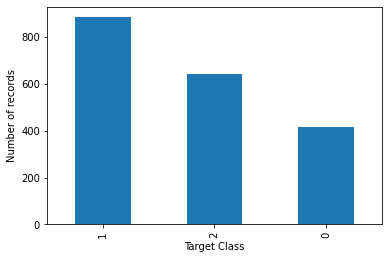

In [43]:
import matplotlib.pyplot as plt

count = y_train.value_counts()
count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Target Class')
plt.show()

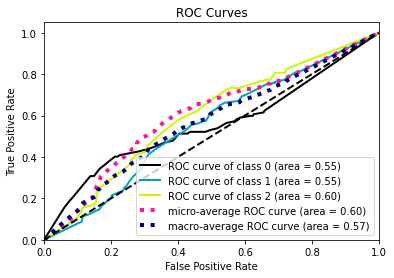

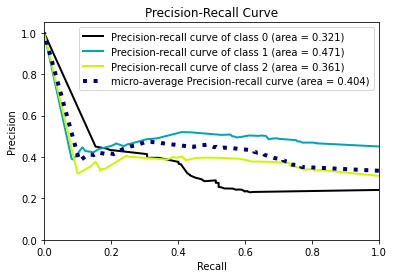

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_score = model.predict_proba(X_test)
y_pred = model.predict(X_test)

# Plot metrics 
plot_roc(y_test, y_score)
plt.show()
    
plot_precision_recall(y_test, y_score)
plt.show()

In [55]:
import numpy as np
n_samples = np.int64(count.median())
n_samples

641

In [56]:
import warnings
warnings.filterwarnings('ignore')

In [57]:
def sampling_strategy(X,y,n_samples, t='majority'):
    target_classes = ''
    if t == 'majority':
        target_classes = y.value_counts() > n_samples
    elif t == 'minority':
        target_classes = y.value_counts() < n_samples
    tc = target_classes[target_classes == True].index
    #target_classes_all = y.value_counts().index
    sampling_strategy = {}
    for target in tc:
        sampling_strategy[target] = n_samples
    return sampling_strategy

In [58]:
from imblearn.under_sampling import ClusterCentroids
under_sampler = ClusterCentroids(sampling_strategy=sampling_strategy(X_train,y_train,n_samples,t='majority'))
X_under, y_under = under_sampler.fit_resample(X_train, y_train)

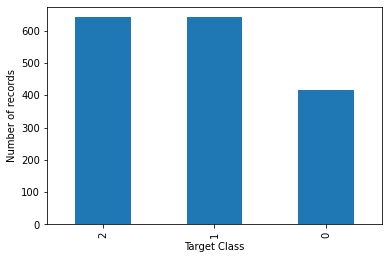

In [59]:
count = y_under.value_counts()
count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Target Class')
plt.show()

In [60]:
from imblearn.over_sampling import SMOTE
over_sampler = SMOTE(sampling_strategy=sampling_strategy(X_under, y_under,n_samples, t='minority'),k_neighbors=2)
X_bal, y_bal = over_sampler.fit_resample(X_under, y_under)

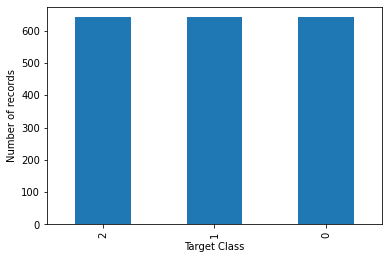

In [61]:
count = y_bal.value_counts()
count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Target Class')
plt.show()

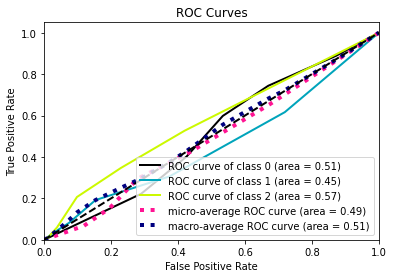

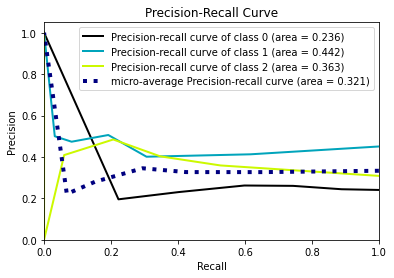

In [62]:
model = KNeighborsClassifier()
model.fit(X_bal, y_bal)
y_score = model.predict_proba(X_test)

y_pred = model.predict(X_test)

# Plot metrics 
plot_roc(y_test, y_score)
plt.show()
    
plot_precision_recall(y_test, y_score)
plt.show()

In [64]:
from sklearn.utils import class_weight


In [68]:
classes = np.unique(y_train)
cw = class_weight.compute_class_weight(class_weight ='balanced',classes= classes, y= y_train)
weights = dict(zip(classes,cw))

Accuracy score: 0.41358024691358025


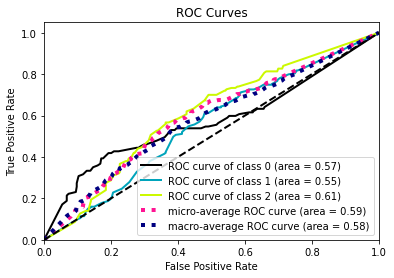

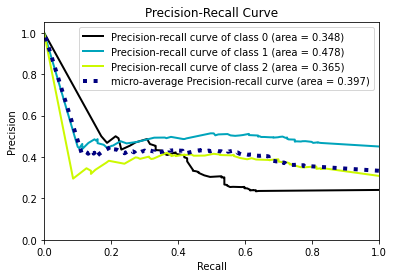

In [70]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(class_weight=weights)
model.fit(X_train, y_train)
y_score = model.predict_proba(X_test)

y_pred = model.predict(X_test)
print('Accuracy score:',accuracy_score(y_test, y_pred ))

# Plot metrics 
plot_roc(y_test, y_score)
plt.show()
    
plot_precision_recall(y_test, y_score)
plt.show()